In [1]:
from module.data_read import DDRDataset, IDRIDDataset
from torch.utils.data import ConcatDataset
from torchvision.transforms import v2
from pathlib import Path
from torch.utils.data import DataLoader
import torch
import torchvision
from module.plot import imshow

DDR_DIR = Path.cwd() / 'DDR-dataset/DR_grading'
IDRID_DIR = Path.cwd() / 'IDRID-Classificacao'

In [6]:
# Para fins de visualização (Acrescentar a transformação específica de cada rede;
# acrescentar transformação do label para classificação binaria e ñ binaria):
data_transforms = {
    'train': v2.Compose([
        v2.ToImage(),
        v2.ToDtype(torch.float32, scale=True),
        v2.Resize((224, 224)),
        v2.RandomHorizontalFlip(),
        v2.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': v2.Compose([
        v2.ToImage(),
        v2.ToDtype(torch.float32, scale=True),
        v2.Resize((224, 224)),
        v2.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

# Leitura FGADR
#fgadr_dataset = FGADRDataset(FGADR_DIR/'Original_Images',
#                             FGADR_DIR/'DR_Seg_Grading_Label.csv',
#                             data_transforms['train'])
# Leitura DDR
train_ddr_dataset = DDRDataset(DDR_DIR/'train',
                         DDR_DIR/'train.txt',
                         data_transforms['train'],
                         convert_to_binary=True,
                         )
valid_ddr_dataset = DDRDataset(DDR_DIR/'valid',
                         DDR_DIR/'valid.txt',
                         data_transforms['train'],
                         convert_to_binary=True,
                         )
test_ddr_dataset = DDRDataset(DDR_DIR/'test',
                         DDR_DIR/'test.txt',
                         data_transforms['train'],
                         convert_to_binary=True,
                         )
ddr_dataset = ConcatDataset([train_ddr_dataset, valid_ddr_dataset, test_ddr_dataset]) # concat


# Leitura IDRID
train_idrid_dataset = IDRIDDataset(IDRID_DIR/'1. Original Images/a. Training Set',
                                   IDRID_DIR/'2. Groundtruths/a. IDRiD_Disease Grading_Training Labels.csv',
                                   data_transforms['val'],
                             convert_to_binary=True,
                                   )
test_idrid_dataset = IDRIDDataset(IDRID_DIR/'1. Original Images/b. Testing Set',
                                  IDRID_DIR/'2. Groundtruths/b. IDRiD_Disease Grading_Testing Labels.csv',
                                  data_transforms['val'],
                             convert_to_binary=True,
                                  )
idrid_dataset = ConcatDataset([train_idrid_dataset, test_idrid_dataset]) # concat

# fgadr_dataloader = DataLoader(fgadr_dataset, batch_size=4, shuffle=True, num_workers=2)
ddr_dataloader = DataLoader(ddr_dataset, batch_size=32, shuffle=True, num_workers=2)
idrid_dataloader = DataLoader(idrid_dataset, batch_size=32, shuffle=True, num_workers=2)

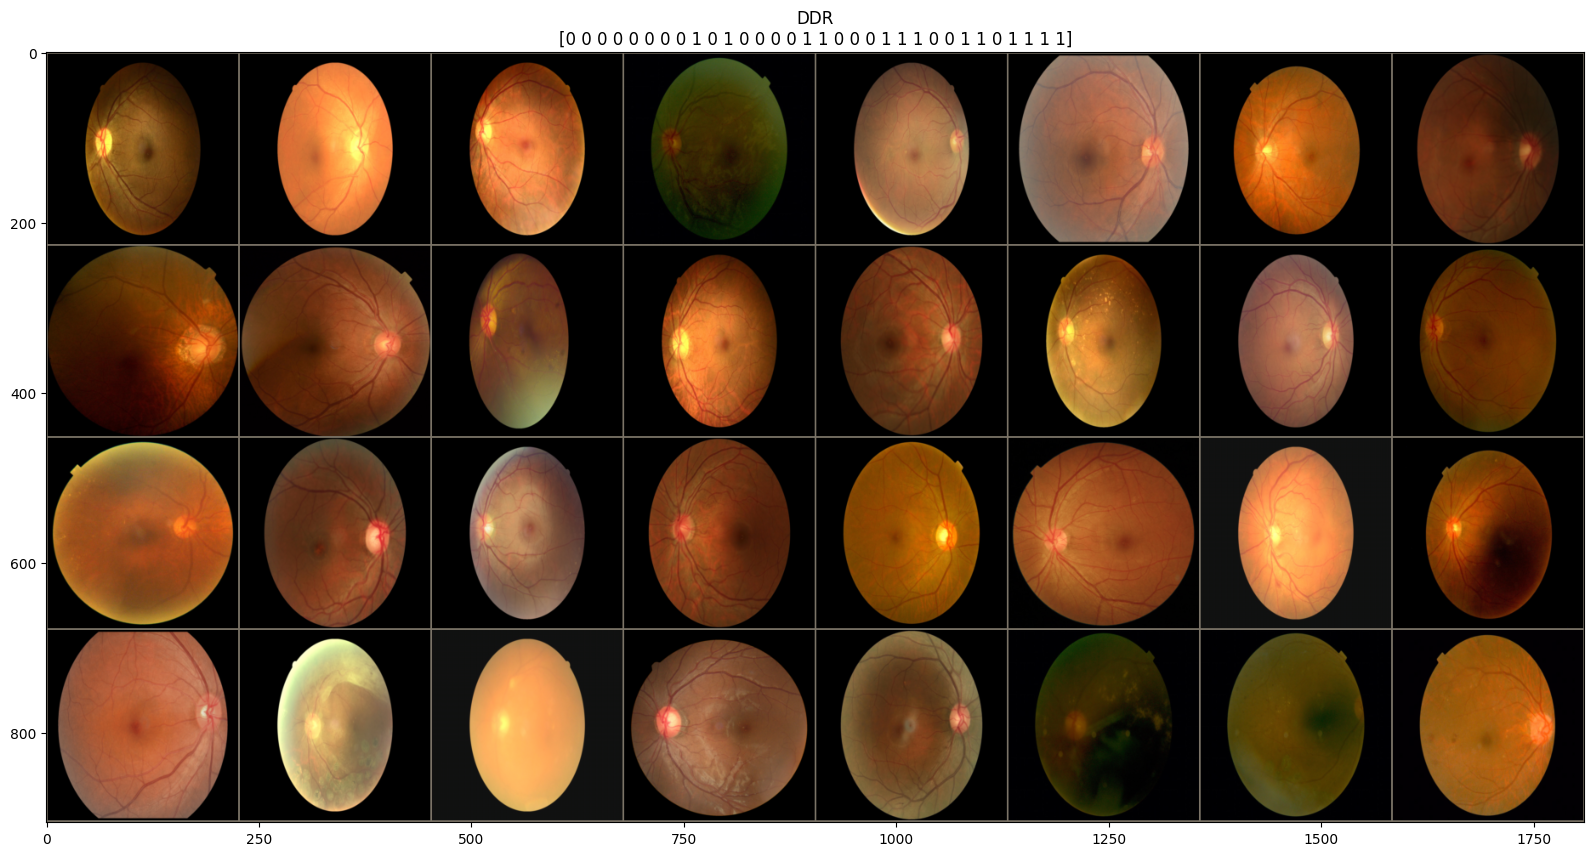

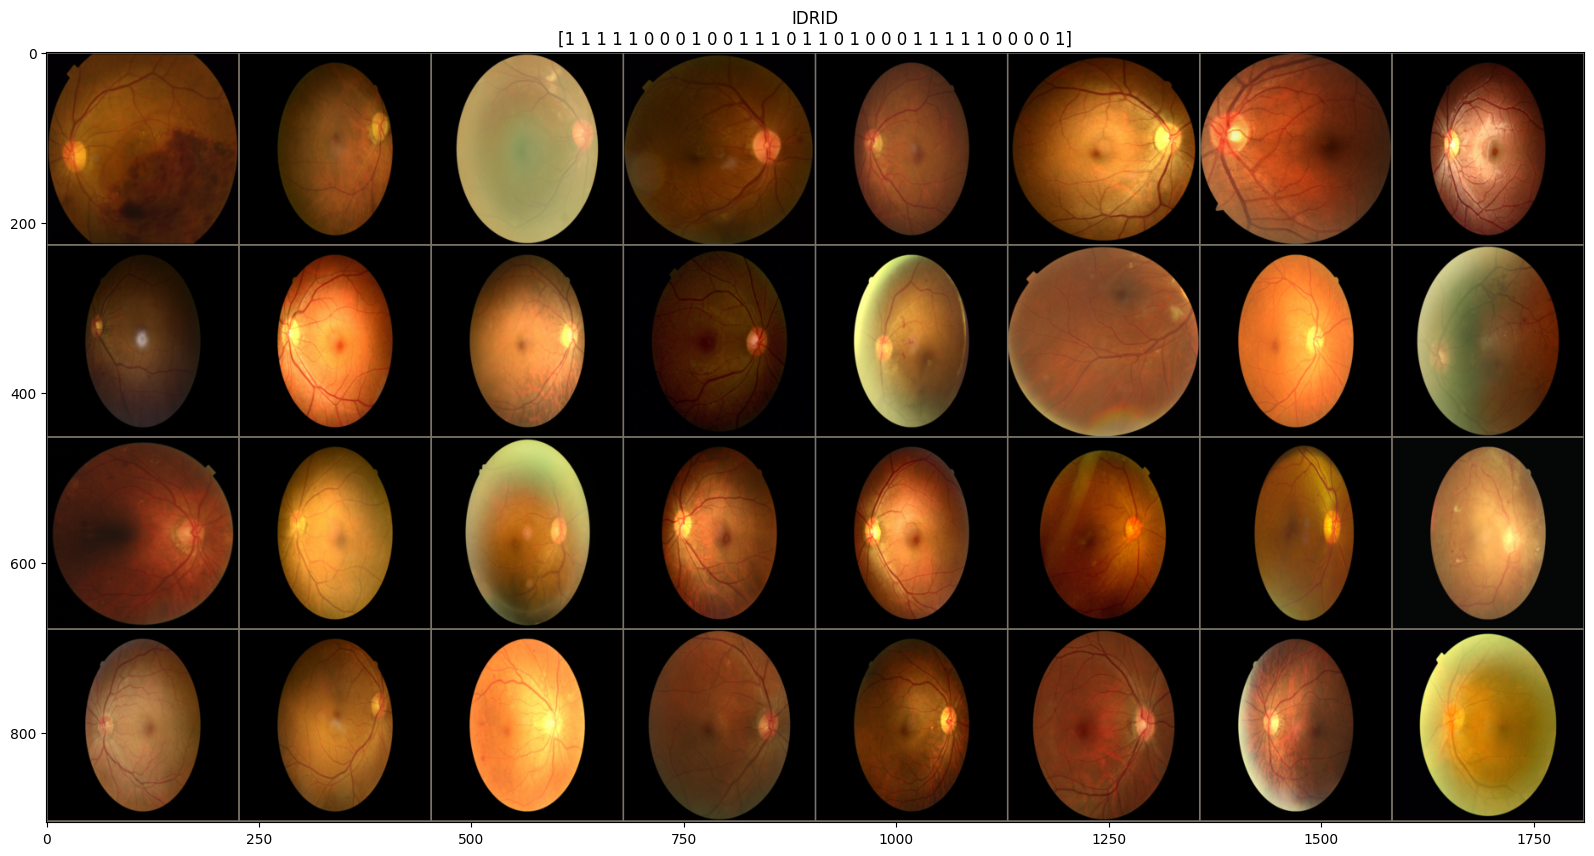

In [7]:
# # plot FGADR
# batch_fgadr = next(iter(fgadr_dataloader))
# imgs_fgadr, retinopathy_grades_fgadr = batch_fgadr['img'], batch_fgadr['retinopathy_grade']
# out_train = torchvision.utils.make_grid(imgs_fgadr)
# imshow(out_train, title='FGADR\n'+str(retinopathy_grades_fgadr.numpy()))

# plot DDR
batch_ddr = next(iter(ddr_dataloader))
imgs_ddr, retinopathy_grades_ddr = batch_ddr['img'], batch_ddr['retinopathy_grade']
out_test = torchvision.utils.make_grid(imgs_ddr)
imshow(out_test, title='DDR\n'+str(retinopathy_grades_ddr.numpy()))
# print(retinopathy_grades_ddr)

# plot IDRID
batch_idrid = next(iter(ddr_dataloader))
imgs_idrid, retinopathy_grades_idrid = batch_idrid['img'], batch_idrid['retinopathy_grade']
out_test = torchvision.utils.make_grid(imgs_idrid)
imshow(out_test, title='IDRID\n'+str(retinopathy_grades_idrid.numpy()))